## Logistic Regression

In [50]:
# Creating the Logistic classifier, and fitting it on the training data to make predictions on the testing data
logreg = LogisticRegression(C=1e10)
logreg.fit(X_train, y_train)

LogisticRegression(C=10000000000.0)

In [51]:
# Predicting tesing data using logreg
logreg_prediction = logreg.predict(X_test)

In [52]:
# probabilit for each values

pred_prob_log = logreg.predict_proba(X_test)[:,1]
pred_prob_log

array([0.9995581 , 0.69210251, 0.1369188 , ..., 0.47505612, 0.1833869 ,
       0.02493141])

In [53]:
#printing classifiction report of logistic regression
print('Classification Report for Logistic Regression\n')
print(classification_report(y_test, logreg_prediction))

Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     38236
           1       0.94      0.70      0.80     20829

    accuracy                           0.88     59065
   macro avg       0.90      0.84      0.86     59065
weighted avg       0.89      0.88      0.87     59065



Predicted Results 
 [[37383   853]
 [ 6292 14537]]


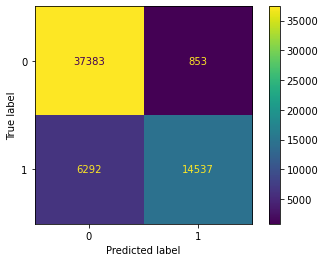

In [54]:
#printing the confusion matrix of Logistic regression
cm_log = confusion_matrix(y_test,logreg_prediction)
print('Predicted Results \n',cm_log)
mat_cm_log = plot_confusion_matrix(logreg,X_test,y_test); 
mat_cm_log;

## Decision Tree

In [55]:
# Creating the Decision Tree classifier, and fitting it on the training data to make predictions on the testing data

dtree_class = DecisionTreeClassifier()
dtree_class.fit(X_train, y_train)
dtree_prediction = dtree_class.predict(X_test)

In [56]:
# probability for each values
pred_prob_dt = dtree_class.predict_proba(X_test)[:,1]
pred_prob_dt

array([1., 1., 0., ..., 1., 0., 0.])

In [57]:
print('Classification Report for Decision Tree\n')
print(classification_report(y_test, dtree_prediction))

Classification Report for Decision Tree

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     38236
           1       0.90      0.90      0.90     20829

    accuracy                           0.93     59065
   macro avg       0.92      0.92      0.92     59065
weighted avg       0.93      0.93      0.93     59065



Predicted Results 
 [[36099  2137]
 [ 2067 18762]]


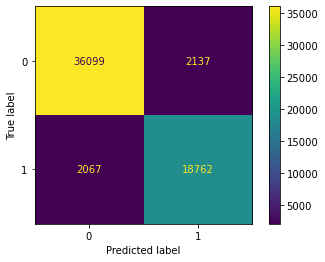

In [58]:
#printing the confusion matrix of Decision Tree Classifier
cm_dt = confusion_matrix(y_test,dtree_prediction)
print('Predicted Results \n',cm_dt)
mat_cm_dt =  plot_confusion_matrix(dtree_class,X_test,y_test);
mat_cm_dt;

## Random Forest Classifier

In [59]:
# Creating the Random Forest classifier, and fitting it on the training data to make predictions on the testing data
rf_class = RandomForestClassifier()
rf_class.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
# Predicting tesing data using Random Forest

rf_class_prediction = rf_class.predict(X_test)

In [61]:
# probabilit for each values

pred_prob_rf = rf_class.predict_proba(X_test)[:,1]
pred_prob_rf

array([0.96, 0.97, 0.02, ..., 0.73, 0.07, 0.04])

In [62]:
#printing classifiction report of Random Forest
print('Classification Report for Random Forest Classifier \n')
print(classification_report(y_test, rf_class_prediction))

Classification Report for Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     38236
           1       0.97      0.84      0.90     20829

    accuracy                           0.94     59065
   macro avg       0.94      0.91      0.93     59065
weighted avg       0.94      0.94      0.93     59065



Predicted Results 
 [[37687   549]
 [ 3288 17541]]


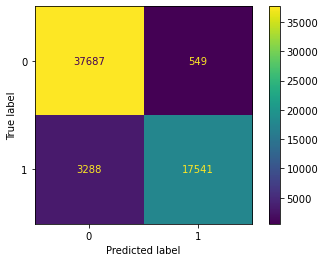

In [63]:
#printing the confusion matrix of Random Forest
cm_rf = confusion_matrix(y_test,rf_class_prediction)
print('Predicted Results \n',cm_rf)
mat_cm_rf = plot_confusion_matrix(rf_class,X_test,y_test);
mat_cm_rf;

## Overall Confusion Matrix

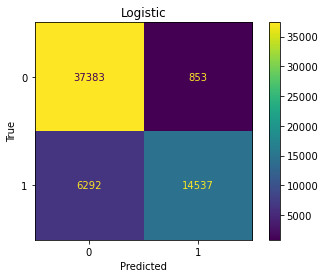

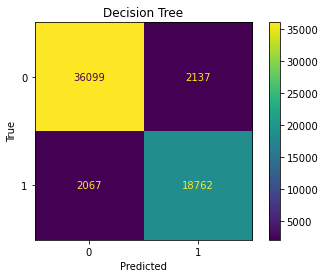

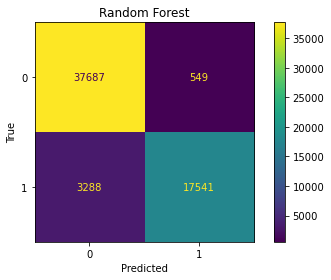

In [64]:
# Creating a Confusion Matrix of all the classifiers
class_mats = [mat_cm_log,mat_cm_dt,mat_cm_rf]
names = ['Logistic','Decision Tree','Random Forest']
count = 0
for i in class_mats:
    i.plot() 
    plt.title(names[count]);
    plt.grid(False);
    i.ax_.set(xlabel='Predicted', ylabel='True');    
    count=count+1
plt.tight_layout()
plt.show()

## Overall Classification Report

In [65]:
print('\t\t\t Logistic Regression: \n\n',classification_report( y_test, logreg_prediction))
print('\t\t\t Decision Tree \n\n',classification_report(y_test, dtree_prediction))
print('\t\t\t Random Forest \n\n',classification_report(y_test, rf_class_prediction))

			 Logistic Regression: 

               precision    recall  f1-score   support

           0       0.86      0.98      0.91     38236
           1       0.94      0.70      0.80     20829

    accuracy                           0.88     59065
   macro avg       0.90      0.84      0.86     59065
weighted avg       0.89      0.88      0.87     59065

			 Decision Tree 

               precision    recall  f1-score   support

           0       0.95      0.94      0.94     38236
           1       0.90      0.90      0.90     20829

    accuracy                           0.93     59065
   macro avg       0.92      0.92      0.92     59065
weighted avg       0.93      0.93      0.93     59065

			 Random Forest 

               precision    recall  f1-score   support

           0       0.92      0.99      0.95     38236
           1       0.97      0.84      0.90     20829

    accuracy                           0.94     59065
   macro avg       0.94      0.91      0.93     59065
weig

## ROC AUC for Logistic Regression

In [66]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import metrics

# Converting the testing output to integer for graphical purpose
y_test_roc = y_test.astype('int')

In [67]:
# Logistic AUC and No Skill AUC

noskill = [0 for _ in range(len(y_test))]

Main_AUC_prob_log = roc_auc_score(y_test, pred_prob_log)
Noskill_AUC_log = roc_auc_score(y_test, noskill)
print('Logistic Regression ROC AUC : %.3f' % Main_AUC_prob_log)
print('No skill classifier ROC AUC: %.3f' % Noskill_AUC_log)
print('Accuracy : ',metrics.accuracy_score(y_test, dtree_prediction))

Logistic Regression ROC AUC : 0.929
No skill classifier ROC AUC: 0.500
Accuracy :  0.9288241767544231


## ROC AUC for Decision Tree Classifier

In [68]:
# Decision Tree AUC and No Skill AUC

noskill = [0 for _ in range(len(y_test))]

Main_AUC_prob_dt = roc_auc_score(y_test, pred_prob_dt)
Noskill_AUC_dt = roc_auc_score(y_test, noskill)
print('Decision Tree Classifier  ROC AUC : %.3f' % Main_AUC_prob_dt)
print('No skill classifier ROC AUC: %.3f' % Noskill_AUC_dt)
print('Accuracy : ',metrics.accuracy_score(y_test, dtree_prediction))

Decision Tree Classifier  ROC AUC : 0.922
No skill classifier ROC AUC: 0.500
Accuracy :  0.9288241767544231


## ROC AUC for Random Forest

In [69]:
# Random Forest AUC and No Skill AUC

noskill = [0 for _ in range(len(y_test))]

Main_AUC_prob_rf = roc_auc_score(y_test, pred_prob_rf)
Noskill_AUC_rf = roc_auc_score(y_test, noskill)
print('Random Forest ROC AUC : %.3f' % Main_AUC_prob_rf)
print('No skill classifier ROC AUC: %.3f' % Noskill_AUC_rf)
print('Accuracy : ',metrics.accuracy_score(y_test, rf_class_prediction))

Random Forest ROC AUC : 0.980
No skill classifier ROC AUC: 0.500
Accuracy :  0.9350376703631592


AUC score for Logistic Regression: 0.9293799020856448
AUC score for Decision Tree Classifier: 0.9224368106791967
AUC score for Random Forest: 0.9804034389273275


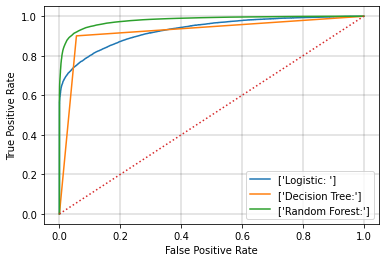

In [70]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test_roc, pred_prob_log)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_roc, pred_prob_dt)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test_roc, pred_prob_rf)

print("AUC score for Logistic Regression:", roc_auc_score(y_test, pred_prob_log,average='macro'))
print("AUC score for Decision Tree Classifier:", roc_auc_score(y_test, pred_prob_dt,average='macro'))
print("AUC score for Random Forest:", roc_auc_score(y_test, pred_prob_rf,average='macro'))

auc1 = metrics.roc_auc_score(y_test, pred_prob_log)
auc2 = metrics.roc_auc_score(y_test, pred_prob_dt)
auc3 = metrics.roc_auc_score(y_test, pred_prob_rf)

plt.plot(fpr1, tpr1,label="AUC="+str(auc1))
plt.plot(fpr2, tpr2,label="AUC="+str(auc2))
plt.plot(fpr3, tpr3,label="AUC="+str(auc3))


plt.plot([0,1], [0,1], ls=':')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend([['Logistic: '], ['Decision Tree:'], ['Random Forest:']]) 

plt.grid(color='black', linestyle='-', linewidth=0.2);